In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [5]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [6]:
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])
X_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

In [7]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [8]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [9]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [10]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W /np.absolute(W) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [11]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-1, reg=1e-4)

Iter: 0, weights: [11.99389407 -0.0709646   4.1640147   1.63360745], error 3287.0265398050296
Iter: 500, weights: [56.49995     6.30285175 -0.35560289  6.57088504], error 24.90461898719765
Iter: 1000, weights: [56.49995     6.30289122 -0.35579345  6.57104233], error 24.904618940997473
Iter: 1500, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.904618940996166
Iter: 2000, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.90461894099619
Iter: 2500, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.90461894099619
Iter: 3000, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.90461894099619
Iter: 3500, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.90461894099619
Iter: 4000, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.90461894099619
Iter: 4500, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.90461894099619
Final MSE: 24.90461894099619


array([56.49995   ,  6.30289122, -0.35579346,  6.57104233])

In [12]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
    
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        

    return W

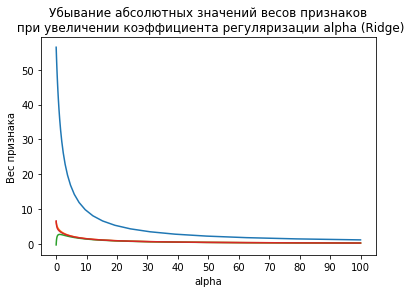

In [13]:
n = 50
alpha_list = np.logspace(-3, 2, n)
coeffs = np.zeros((n, X_st.shape[1]))

for i, val in enumerate(alpha_list):
    
    coeffs[i, :] = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=val)
    
for i in range(X_st.shape[1]):
    plt.plot(alpha_list, coeffs[:, i])

  
plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Ridge)')
plt.xticks(np.arange(0, 101, 10))
plt.xlabel('alpha')
plt.ylabel('Вес признака');

# Вывод: При маленьком alpha веса почти не штрафуются, при большом альфа веса сильно уменьшаются. 

*Сгенерируйте датасет при помощи sklearn.datasets.make_regression и 
обучите линейную модель при помощи градиентного и стохастического градиентного спуска.
Нанесите среднеквадратичную ошибку для обоих методов на один график,
сделайте выводы о разнице скорости сходимости каждого из методов.

In [14]:
from sklearn import datasets

In [15]:
X, Y, coef = datasets.make_regression(n_samples = 1000, n_features = 4, n_informative = 3, n_targets = 1, noise = 5, 
                                      coef = True, random_state=2)
X[:, 0] *= 10 
display(X, Y, coef)

array([[-1.36978296, -2.42825346, -0.25712497, -0.64920516],
       [ 4.08799894, -0.1050503 ,  0.15000076,  0.27768096],
       [-4.92281496,  0.2865998 , -0.40914303,  0.70239459],
       ...,
       [ 1.25623099, -1.83568573,  0.35261274, -0.78941501],
       [ 6.0143441 , -0.14955855, -1.43328758, -0.95326904],
       [ 2.02027265,  1.27799273,  1.16542739,  0.5714512 ]])

array([-1.47090356e+02,  2.45243821e+01,  4.29583698e+01, -5.18751090e+01,
       -4.88438454e+01, -8.64208177e+01, -1.42082738e+01,  9.87664660e+01,
        3.26038623e+01, -8.22367084e+01, -1.47349127e+01,  1.25380599e+02,
        1.51511353e+01,  1.82244670e+01,  4.92581680e+00, -5.85788502e+01,
        3.57838037e+01,  9.93967471e+01,  1.57226412e+01, -8.20152097e+01,
       -3.78955859e+01, -3.16498769e+01, -6.50534894e+01, -4.31824117e+01,
       -1.10426550e+02,  2.22002856e+02,  6.32223908e+01, -1.21515125e+02,
        8.51324165e+00, -3.76638109e+01,  8.77233429e+01,  2.29410160e+02,
        7.69717315e+01, -7.95619103e+01,  8.10863860e+01, -5.46726275e+01,
       -4.28923147e+01,  3.49147261e+01,  8.81583498e+01,  3.45936859e+02,
       -1.16497455e+02,  9.46026305e+01,  1.51001275e+02, -6.21516494e+00,
       -8.45611684e+01, -1.21456252e+02, -3.84627186e+01, -1.33631623e+01,
       -3.69167772e+01, -8.81869536e+01, -1.63110393e+02,  1.84895725e+01,
       -2.43930807e+01,  

array([ 0.        , 34.65254101, 34.97278679, 75.03686389])

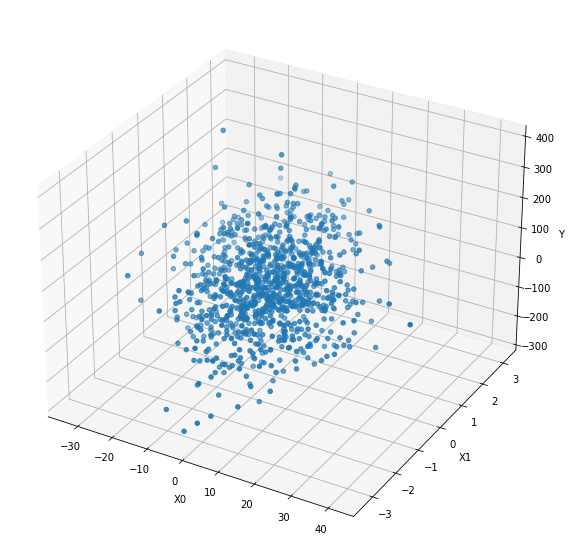

In [16]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')
plt.show()

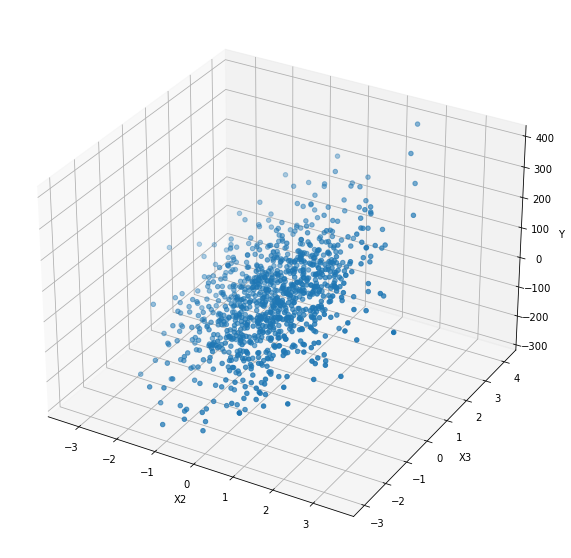

In [17]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,2], X[:,3], Y)
ax.set_xlabel('X2')
ax.set_ylabel('X3')
ax.set_zlabel('Y')
plt.show()

In [18]:
def standart_scale(X):
    mean_x = X.mean()
    std_x = X.std()
    return (X - mean_x)/std_x
    

In [19]:
X_copy = X.copy().astype(np.float64)
X_copy[:, 0] = standart_scale(X_copy[:, 0])
X_copy[:, 1] = standart_scale(X_copy[:, 1])
X_copy[:, 2] = standart_scale(X_copy[:, 2])
X_copy[:, 3] = standart_scale(X_copy[:, 3])

In [20]:
X_copy[:, 0].mean(),X_copy[:, 1].mean(),X_copy[:, 2].mean(),X_copy[:, 3].mean()

(1.0658141036401503e-17,
 1.9539925233402754e-17,
 -2.398081733190338e-17,
 -1.2434497875801754e-17)

In [21]:
X_copy[:, 0].std(),X_copy[:, 1].std(),X_copy[:, 2].std(),X_copy[:, 3].std()

(1.0, 0.9999999999999999, 1.0, 0.9999999999999999)

In [22]:
X_ones = np.ones((X.shape[0], 1))
X_copy = np.hstack((X_ones, X_copy))
X_copy

array([[ 1.        , -0.07448334, -2.3240064 , -0.31203911, -0.63729806],
       [ 1.        ,  0.46997034, -0.01245973,  0.10351502,  0.24756021],
       [ 1.        , -0.42892429,  0.3772253 , -0.46720428,  0.65301602],
       ...,
       [ 1.        ,  0.18748076, -1.73441183,  0.31032151, -0.77115037],
       [ 1.        ,  0.66213736, -0.05674466, -1.51255088, -0.92757475],
       [ 1.        ,  0.26369951,  1.363644  ,  1.13996322,  0.52801   ]])

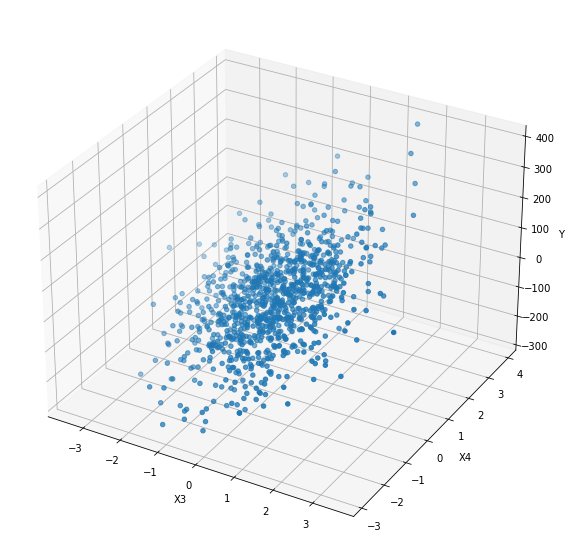

In [23]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_copy[:,3], X_copy[:,4], Y)
ax.set_xlabel('X3')
ax.set_ylabel('X4')
ax.set_zlabel('Y')
plt.show()

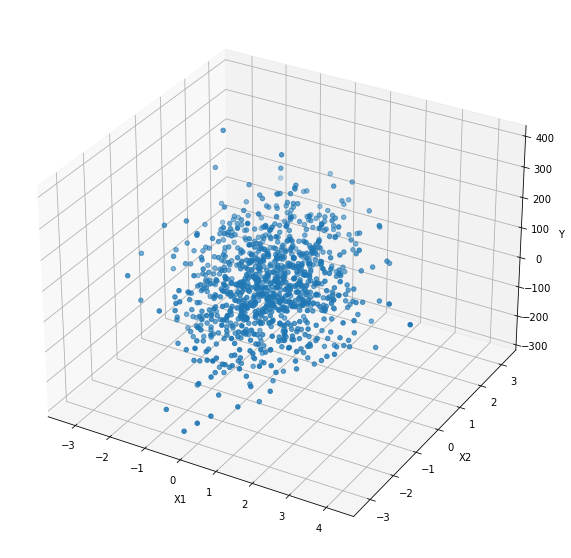

In [24]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_copy[:,1], X_copy[:,2], Y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [25]:
#Для тестовой выборки возьмем 40%
X_train = X_copy[:400, :]
Y_train = Y[:400]

In [26]:
def calc_mse(y, y_pred):
    return np.mean((y_pred-y)**2)

In [27]:
def classic_gradient(X, y, iterations, alpha):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    err = np.ones((iterations, 1))
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err[i,] = calc_mse(y, y_pred)
        W -= alpha * 2/n * X.T @ (y_pred - y)
        if i % 100 == 0:
            print(f'Итерация {i}, Веса {W}, MSE {err[i,]} ')
    return W, err

In [28]:
W_grad, err_grad = classic_gradient(X_train, Y_train, 1000, 1e-1.3)
err_grad = np.array(err_grad[:,0]) 

SyntaxError: invalid syntax (Temp/ipykernel_8936/3088350488.py, line 1)

In [ ]:
def stohastic_gradient(X, y, iterations, size, alpha):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    err = np.ones((iterations, 1))
    for i in range(0, iterations):
        temp = np.random.randint(n,size=size)
        x_temp = X[temp, ]
        y_temp = np.array(y)[temp]
        y_pred_temp = np.dot(x_temp, W)
        W -= alpha * 2/len(y_temp) * x_temp.T @ (y_pred_temp - y_temp)
        err[i,] = calc_mse(y, np.dot(X,W))
        if i % 100 == 0:
            print(f'Итерация {i}, Веса {W}, MSE {err[i,]} ')
    return W, err

In [ ]:
W_stoh, err_stoh = stohastic_gradient(X_train, Y_train, 1000,  1e-3)
err_stoh = np.array(err_stoh[:,0]) 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(range(len(err_grad)), err_grad)
plt.plot(range(len(err_stoh)), err_stoh)
plt.title('Разница стохастического от градиентного')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.ylim(0, 6000)
plt.xlim(0,200)

plt.show()

In [ ]:
#Вывод: Стохастический дошел до минимума быстрее чем градиентый спуск, скорее всего это связано 
#с тем, что во первых, у нас не так много весов, а во вторых тут работает случайность

In [ ]:
#Посчитаем среднеквадратичную ошибку весов
calc_mse(W_grad[1], coef[0]), calc_mse(W_grad[2], coef[1]), calc_mse(W_grad[3], coef[2]), calc_mse(W_grad[4], coef[3])

In [ ]:
W_grad